## `Concatenation`
***

In [37]:
import pandas as pd
import numpy as np
import seaborn as snp

### _importing dataset_

In [32]:
df = pd.read_csv("Data.csv")
df2 = pd.DataFrame({"Country" : ['India','USA','Ireland'],"city" : ['dewas','Luziana','dublin']})


In [19]:
df3 = pd.concat([df,df2],ignore_index=True)
df3
df3 = pd.concat([df,df2],axis=1)
df3

,Country,Age,Salary,Purchased,name,city
0,France,44.0,72000.0,No,x,dewas
1,Spain,27.0,48000.0,Yes,y,indore
2,Germany,30.0,54000.0,No,z,nagda
3,Spain,38.0,61000.0,No,NaN,NaN
4,Germany,40.0,NaN,Yes,NaN,NaN
5,France,35.0,58000.0,Yes,NaN,NaN
6,Spain,NaN,52000.0,No,NaN,NaN
7,France,48.0,79000.0,Yes,NaN,NaN
8,Germany,50.0,83000.0,No,NaN,NaN
9,France,37.0,67000.0,Yes,NaN,NaN


## `Merging and joins`
***

In [33]:
df4 = pd.merge(df,df2,on = "Country",how='outer')
#Merging can be of - left , right , inner and outer 
df4

,Country,Age,Salary,Purchased,city
0,France,44.0,72000.0,No,NaN
1,France,35.0,58000.0,Yes,NaN
2,France,48.0,79000.0,Yes,NaN
3,France,37.0,67000.0,Yes,NaN
4,Spain,27.0,48000.0,Yes,NaN
5,Spain,38.0,61000.0,No,NaN
6,Spain,NaN,52000.0,No,NaN
7,Germany,30.0,54000.0,No,NaN
8,Germany,40.0,NaN,Yes,NaN
9,Germany,50.0,83000.0,No,NaN


# ***`Regression`***
***

## _Linear Regression_ **y=mx+c**


### Terms to remember
#Correlation gives you values between -1 to 1
#best fit line
#errors
#Sum square errors to find best fit line (x - X)2


/Users/sarthakpunjabi/Desktop/machine learning and data science/data_with_python/env1/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='newspaper', ylabel='Density'>

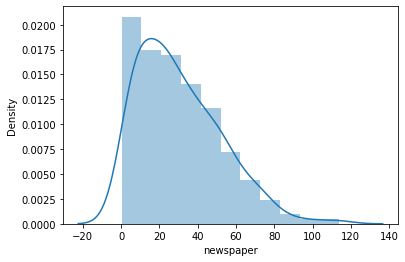

In [50]:
#Correlation gives you values between -1 to 1 
#best fit line
#errors
# Sum square errors to find best fit line (x - X)2

df = pd.read_csv("Advertising.csv")
df = df.drop("Unnamed: 0",axis=1)
df.dtypes
df.isnull().sum()
#checking for the distribution of the independent variables difference between mean and median 
df.describe() 

snp.distplot(df['newspaper'])




## Transformatin technique to convert skewed to normal distribution

In [52]:
#log squareroot and cuberoot 

df['newspaper'] = np.log1p(df['newspaper'])
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,1.397233,14.022500
std,85.854236,14.846809,0.246014,5.217457
min,0.700000,0.000000,0.232986,1.600000
25%,74.375000,9.975000,1.286754,10.375000
50%,149.750000,22.900000,1.455474,12.900000
75%,218.825000,36.525000,1.575015,17.400000
max,296.400000,49.600000,1.748318,27.000000


# `Feature Scaling`

## _to scale the features_

In [65]:
#Min max scaler with outliers  and standard scaler
from sklearn.preprocessing import MinMaxScaler
X = df.iloc[:,:-1]
mn = MinMaxScaler()
df_mn = mn.fit_transform(X)
df_mn = pd.DataFrame(df_mn,columns=X.columns,index=X.index)
df_mn





,TV,radio,newspaper
0,0.775786,0.762097,0.940717
1,0.148123,0.792339,0.885633
2,0.055800,0.925403,0.940896
3,0.509976,0.832661,0.919601
4,0.609063,0.217742,0.919383
...,...,...,...
195,0.126818,0.074597,0.708685
196,0.316199,0.098790,0.615540
197,0.596212,0.187500,0.571571
198,0.956713,0.846774,0.935206


In [67]:
df_mn.corr()

,TV,radio,newspaper
TV,1.000000,0.054809,0.018988
radio,0.054809,1.000000,0.207854
newspaper,0.018988,0.207854,1.000000


# `Train test split`

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
x = df_mn
y = df['sales']



In [85]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=43)


In [86]:
#model training
lr = LinearRegression()
lr.fit(X_train,Y_train)



LinearRegression()

In [87]:
#prediction

pred = lr.predict(X_test)

# evaluation
## _metrics_
### 



In [89]:
r2_score(Y_test,pred)
mean_absolute_error(Y_test,pred)
mean_squared_error(Y_test,pred)

2.088233844017377

In [91]:
# coefficients weightage given to variables using gradient descent algorithm

lr.coef_



array([13.41074346,  9.19918519,  0.54076704])

In [95]:
#droopping the last newspaper variable because it is not given weightage

x = df_mn.drop("newspaper",axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=43)
lr = LinearRegression()
lr.fit(X_train,Y_train)
pred = lr.predict(X_test)
r2_score(Y_test,pred)
# mean_absolute_error(Y_test,pred)
# mean_squared_error(Y_test,pred)


0.9285742514931037

# `Overfitting and underfitting`

In [99]:
#check for overfitting here the model is overfitting slightly coz in r2 score we pass y train instead of y test

pred_train = lr.predict(X_train)

r2_score(Y_train,pred_train)

0.8884728077522832